In [ ]:
import k3d
import math
import numpy as np

bodies_count = 25
bodies = np.random.random_sample((bodies_count, 7))
bodies[:, 0:6] -= 0.5
bodies[:, 3:6] *= 0.05
bodies[:,6] = (bodies[:,6] + 0.5) * 1000
bodies[0,:] = np.array([0,0,0,0,0,0,1e6])

for i in range(1, bodies_count):
    bodies[i, 0:3] = (bodies[i, 0:3] / np.linalg.norm(bodies[i, 0:3])) * 0.5

plot = k3d.plot(antialias=True)
points = k3d.points(bodies[:, 0:3].astype(np.float32), color=0, point_size=0.05)
plot += points
plot.display()

In [ ]:
plot.camera_auto_fit = False
plot.grid_auto_fit = False

G = 6.67E-11
lines = []
speeds = []
positions_animated = {}

for i in range(bodies_count):
    lines.append([])
    speeds.append([])
    
for t in range(500):    
    for i in range(bodies_count):
        sum_force = np.zeros(3)
        
        for j in range(bodies_count):
            if i == j:
                continue
            
            direction = bodies[j, 0:3] - bodies[i, 0:3]            
            force = G * bodies[i, 6] * bodies[j, 6] * direction
            force = force / (np.linalg.norm(direction) ** 3)
            sum_force = sum_force + force

        bodies[i, 3:6] = bodies[i, 3:6] + sum_force / bodies[i, 6]
    
    for i in range(bodies_count):
        bodies[i, 0:3] = bodies[i, 0:3] + bodies[i, 3:6] * 0.2
        lines[i].append(np.copy(bodies[i, 0:3]))
        speeds[i].append(np.linalg.norm(bodies[i, 3:6]))
    
    points.positions = np.copy(bodies[:, 0:3]).astype(np.float32)
    positions_animated[str(t / 25.0)] = points.positions.copy()

for line, speed in zip(lines, speeds):
    plot += k3d.line(line, attribute=speed, shader="mesh", width=0.0025, 
                     color_range=[0,0.1], color_map=k3d.basic_color_maps.Jet)    

# Time series

In [ ]:
points.positions = positions_animated

In [ ]:
plot.time = 2

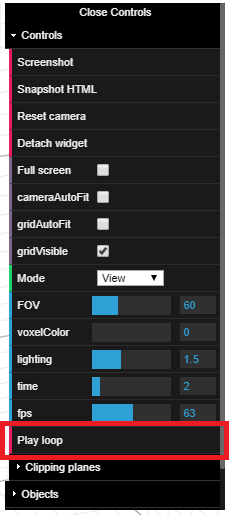